k-NN

In [2]:
import mglearn
import pandas as pd
import sys
import numpy as np
import scipy as sp
import IPython
import matplotlib.pyplot as plt
#한글 폰트사용
from matplotlib import font_manager, rc
font_name =font_manager.FontProperties(fname="c:/Windows/Fonts/malgun.ttf").get_name()
rc('font', family=font_name)

C:\Users\NT500R\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:85: DeprecationWarning: Function make_blobs is deprecated; Please import make_blobs directly from scikit-learn
  warnings.warn(msg, category=DeprecationWarning)
C:\Users\NT500R\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\NT500R\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:180: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0, flags=flags)


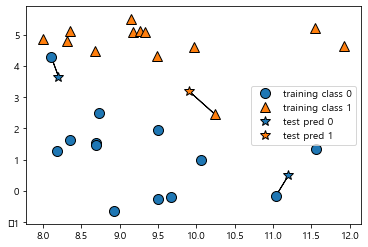

In [3]:
mglearn.plots.plot_knn_classification(n_neighbors=1) # k = 1 일때의 분류결과

C:\Users\NT500R\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:85: DeprecationWarning: Function make_blobs is deprecated; Please import make_blobs directly from scikit-learn
  warnings.warn(msg, category=DeprecationWarning)
C:\Users\NT500R\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\NT500R\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:180: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0, flags=flags)


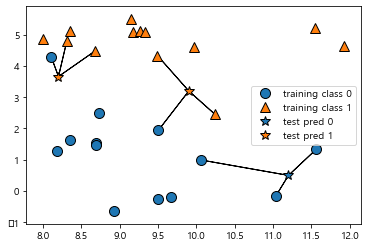

In [4]:
mglearn.plots.plot_knn_classification(n_neighbors=3) # k = 3 일때의 분류결과

In [5]:
#데이터셋 적용시켜보가
from sklearn.model_selection import train_test_split
X, y = mglearn.datasets.make_forge()

X_train, X_test, y_train, y_test = train_test_split(X,y,random_state=0)

C:\Users\NT500R\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:85: DeprecationWarning: Function make_blobs is deprecated; Please import make_blobs directly from scikit-learn
  warnings.warn(msg, category=DeprecationWarning)


In [6]:
from sklearn.neighbors import KNeighborsClassifier
clf = KNeighborsClassifier(n_neighbors=3)

In [7]:
clf.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=3, p=2,
                     weights='uniform')

In [8]:
print("테스트셋 예측",clf.predict(X_test))

테스트셋 예측 [1 0 1 0 1 0 0]


In [9]:
print("테스트셋 정확도: {:.2f}".format(clf.score(X_test,y_test)))

테스트셋 정확도: 0.86


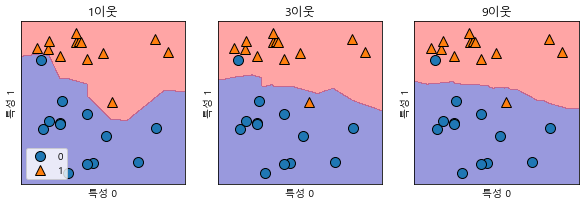

In [10]:
fig, axes = plt.subplots(1,3,figsize=(10,3))

for n_neighbors, ax in zip([1,3,9], axes):
    # fit 메소드는 self 오브젝트를 리턴합니다.
    # 그래서 객체 생성과 fit 메소드를 한 줄에 쓸 수 있습니다.
    clf = KNeighborsClassifier(n_neighbors=n_neighbors).fit(X,y)
    mglearn.plots.plot_2d_separator(clf,X,fill=True,eps=.5,ax=ax,alpha=.4)
    mglearn.discrete_scatter(X[:,0],X[:,1],y,ax=ax)
    ax.set_title("{}이웃".format(n_neighbors))
    ax.set_xlabel("특성 0")
    ax.set_ylabel("특성 1")

axes[0].legend(loc=3) # 첫 번째 그림에만 legend 씌움. axes[1] 이면 두 번째에 씌워짐.


#이웃의 수를 늘릴수록 결정경계가 부드러워진다. 부드러운 결정경계는 단순한 모델을 의미.
#즉, 이웃의 수가 늘어날수록 모델의 복잡도가 낮아진다.
#train set 데이터 갯수 전체를 이웃의 수로 하는 극단적인 경우에는 모든 테스트 포인트가 같은 이웃을 가지게 되므로
#테스트 포인트에 대한 예측은 모두 같은 값이 된다. 즉, trian set에서 가장 많은 데이터 포인트를 가진 범주가 예측값이 된다.

모델의 복잡도와 일반화 사이의 관계 시각화

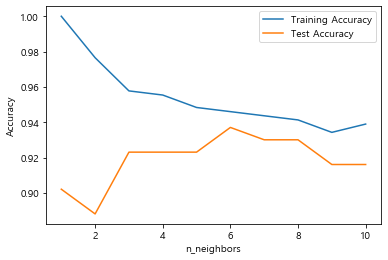

In [11]:
from sklearn.datasets import load_breast_cancer

cancer = load_breast_cancer()
X_train, X_test, y_train, y_test = train_test_split(
    cancer.data, cancer.target, stratify=cancer.target, random_state=66)

training_accuracy = []
test_accuracy = []
#1에서 10까지 n_neighbors 를 적용
neighbors_settings = range(1,11)
for n in neighbors_settings:
    #모델 생성
    clf = KNeighborsClassifier(n_neighbors=n)
    clf.fit(X_train,y_train)
    #training accuracy
    training_accuracy.append(clf.score(X_train,y_train))
    #test accuracy
    test_accuracy.append(clf.score(X_test,y_test))
    
plt.plot(neighbors_settings, training_accuracy, label="Training Accuracy")
plt.plot(neighbors_settings, test_accuracy, label="Test Accuracy")
plt.ylabel("Accuracy")
plt.xlabel("n_neighbors")
plt.legend()

 위 그림을 보면 과대적합과 과소적합의 특징을 볼 수 있다. 먼저 이웃의 수가 작은 복잡한 모델은 train set에 대한 예측이 완벽한 반면에 test set에 대한 예측이 낮음을 볼 수 있다. 이를 과대적합이라고 볼 수 있으며 이웃의 수가 가장 많은 단순한 모델은 train set에 대한 예측이 줄어들고 너무 단순한 모델이므로 test set에 대한 예측 정확도 또한 나빠짐을 볼 수 있다. 이를 과소적합이라고 할 수 있다.
 하지만 위의 그래프를 보면 가장 나쁜 test set의 정확도가 88% 정도 이므로 감안하고 분석을 진행 할 수 있다.

k-최근접 이웃 회귀

C:\Users\NT500R\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\NT500R\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:180: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0, flags=flags)


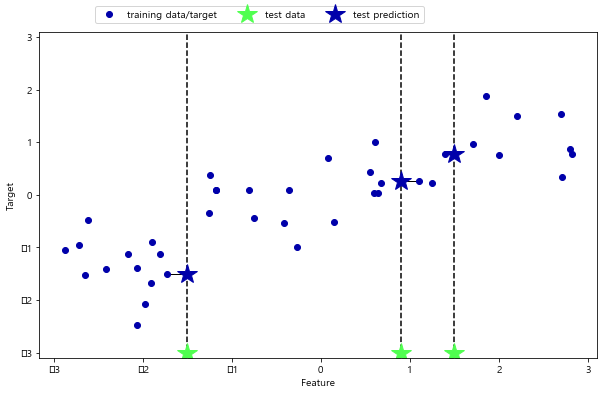

In [12]:
mglearn.plots.plot_knn_regression(n_neighbors=1)

C:\Users\NT500R\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\NT500R\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:180: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0, flags=flags)


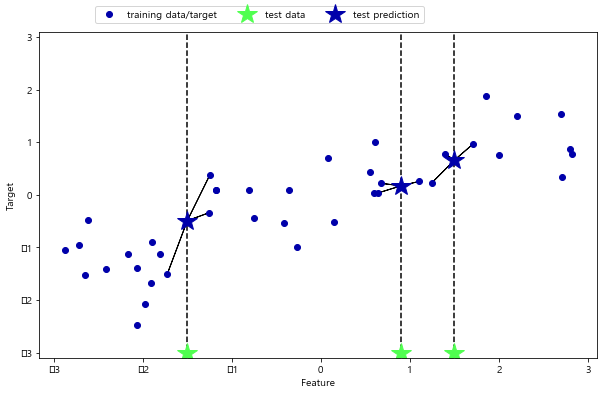

In [13]:
mglearn.plots.plot_knn_regression(n_neighbors=3)

In [14]:
from sklearn.neighbors import KNeighborsRegressor

X, y = mglearn.datasets.make_wave(n_samples=40)

# wave 데이터셋을 train, test set으로 나누기.
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

# 이웃의 수를 3으로 하여 모델링 준비.
reg = KNeighborsRegressor(n_neighbors=3)

# train 데이터와 타깃을 사용하여 모델을 학습.
reg.fit(X_train,y_train)

print("Test set 예측 :\n", reg.predict(X_test))

Test set 예측 :
 [-0.05396539  0.35686046  1.13671923 -1.89415682 -1.13881398 -1.63113382
  0.35686046  0.91241374 -0.44680446 -1.13881398]


In [15]:
print("Test set R^2: {:.2f}".format(reg.score(X_test,y_test)))

Test set R^2: 0.83


C:\Users\NT500R\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\NT500R\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:180: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0, flags=flags)


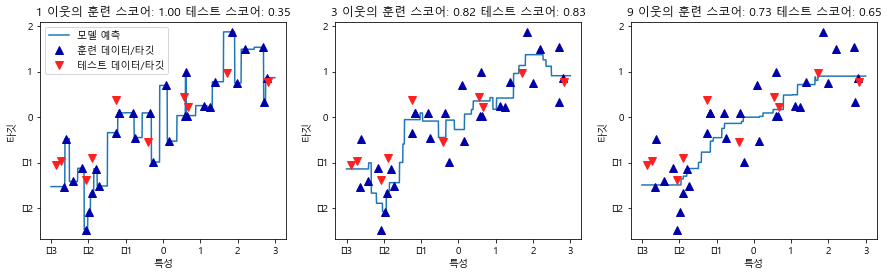

In [16]:
## 이웃의 갯수 별 예측비교
fig, axes = plt.subplots(1,3,figsize=(15,4))

#-3과 3사이에 1000개의 데이터 포인트를 만듦.
line = np.linspace(-3,3,1000).reshape(-1,1)
for n, ax in zip([1,3,9],axes):
    # 1, 3, 9 이웃을 사용한 예측.
    reg = KNeighborsRegressor(n_neighbors=n)
    reg.fit(X_train,y_train)
    ax.plot(line,reg.predict(line))
    ax.plot(X_train,y_train,'^', c=mglearn.cm2(0),markersize=8)
    ax.plot(X_test,y_test,'v',c=mglearn.cm2(1),markersize=8)
    
    ax.set_title(
        "{} 이웃의 훈련 스코어: {:.2f} 테스트 스코어: {:.2f}".format(
                n,reg.score(X_train,y_train),
                reg.score(X_test,y_test)))
    ax.set_xlabel("특성")
    ax.set_ylabel("타깃")

axes[0].legend(["모델 예측","훈련 데이터/타깃", "테스트 데이터/타깃"],loc='best')